# Using GeoJson to plot Vietnam map

Data source: [GADM database](https://gadm.org/download_country.html#google_vignette)

This is a tutorial on how to use GeoJson files to plot Vietnam specific map plot.

## 1. Setting things up

There are a few things we have to set up before plotting our maps.

### 1.1 Importing necessary libraries

In [2]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import geoplot as gplt
import geoplot.crs as gcrs

import random

### 1.2 Load our GeoJSON files

There are 3 files that all depicts Vietnam maps but in increasing complexity level.
- Level 1: Provinces/administrative city level.
- Level 2: Districs level.
- Level 3: Village level.

In [3]:
data_lv1 = gpd.read_file('gadm41_VNM_1.json')
data_lv2 = gpd.read_file('gadm41_VNM_2.json')
data_lv3 = gpd.read_file('gadm41_VNM_3.json')

### 1.3 Other ultilities

We will need to do some cleaning with the dataset as well. One of the task is to convert Vietnamese name to English, which essentially means removing all the diacritics used.

Code: [J2TEAM on Github](https://gist.github.com/J2TEAM/9992744f15187ba51d46aecab21fd469)

In [4]:
s1 = u'ÀÁÂÃÈÉÊÌÍÒÓÔÕÙÚÝàáâãèéêìíòóôõùúýĂăĐđĨĩŨũƠơƯưẠạẢảẤấẦầẨẩẪẫẬậẮắẰằẲẳẴẵẶặẸẹẺẻẼẽẾếỀềỂểỄễỆệỈỉỊịỌọỎỏỐốỒồỔổỖỗỘộỚớỜờỞởỠỡỢợỤụỦủỨứỪừỬửỮữỰựỲỳỴỵỶỷỸỹ'
s0 = u'AAAAEEEIIOOOOUUYaaaaeeeiioooouuyAaDdIiUuOoUuAaAaAaAaAaAaAaAaAaAaAaAaEeEeEeEeEeEeEeEeIiIiOoOoOoOoOoOoOoOoOoOoOoOoUuUuUuUuUuUuUuYyYyYyYy'
def remove_accents(input_str):
	s = ''
	for c in input_str:
		if c in s1:
			s += s0[s1.index(c)]
		else:
			s += c
	return s

## 2. Understand and processing our data

Let's see how our data is structured.

In [5]:
# Level 1 complexity
print(data_lv1.columns)
data_lv1.head(3)

Index(['GID_1', 'GID_0', 'COUNTRY', 'NAME_1', 'VARNAME_1', 'NL_NAME_1',
       'TYPE_1', 'ENGTYPE_1', 'CC_1', 'HASC_1', 'ISO_1', 'geometry'],
      dtype='object')


,GID_1,GID_0,COUNTRY,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,ISO_1,geometry
0,VNM.1_1,VNM,Vietnam,AnGiang,AnGiang,NA,Tỉnh,Province,NA,VN.AG,VN-44,"MULTIPOLYGON (((105.54860 10.42950, 105.54950 ..."
1,VNM.7_1,VNM,Vietnam,BàRịa-VũngTàu,BaRia-VungTau,NA,Tỉnh,Province,NA,VN.BV,NA,"MULTIPOLYGON (((107.09010 10.32400, 107.08890 ..."
2,VNM.3_1,VNM,Vietnam,BắcGiang,BacGiang,NA,Tỉnh,Province,NA,VN.BG,NA,"MULTIPOLYGON (((106.28380 21.13230, 106.27340 ..."


Columns that we will use:
- NAME_1: Name of province in Vietnamese.
- VARNAME_1: Name of privince in English.
- TYPE_1: Administrative level in Vietnamese.
- ENGTYPE_1: Administrative level in English.

---

For level 2 and 3:

In [6]:
# Level 2 complexity
print(data_lv2['NAME_1'].unique())
data_lv2.head(3)

['AnGiang' 'BàRịa-VũngTàu' 'BắcGiang' 'BắcKạn' 'BạcLiêu' 'BắcNinh'
 'BếnTre' 'BìnhĐịnh' 'BìnhDương' 'BìnhPhước' 'BìnhThuận' 'CàMau' 'CầnThơ'
 'CaoBằng' 'ĐàNẵng' 'ĐắkLắk' 'ĐắkNông' 'ĐiệnBiên' 'ĐồngNai' 'ĐồngTháp'
 'GiaLai' 'HàGiang' 'HàNam' 'HàNội' 'HàTĩnh' 'HảiDương' 'HảiPhòng'
 'HậuGiang' 'HồChíMinh' 'HoàBình' 'HưngYên' 'KhánhHòa' 'KiênGiang'
 'KonTum' 'LaiChâu' 'LâmĐồng' 'LạngSơn' 'LàoCai' 'LongAn' 'NamĐịnh'
 'NghệAn' 'NinhBình' 'NinhThuận' 'PhúThọ' 'PhúYên' 'QuảngBình' 'QuảngNam'
 'QuảngNgãi' 'QuảngNinh' 'QuảngTrị' 'SócTrăng' 'SơnLa' 'TâyNinh'
 'TháiBình' 'TháiNguyên' 'ThanhHóa' 'ThừaThiênHuế' 'TiềnGiang' 'TràVinh'
 'TuyênQuang' 'VĩnhLong' 'VĩnhPhúc' 'YênBái']


,GID_2,GID_0,COUNTRY,GID_1,NAME_1,NL_NAME_1,NAME_2,VARNAME_2,NL_NAME_2,TYPE_2,ENGTYPE_2,CC_2,HASC_2,geometry
0,VNM.1.1_1,VNM,Vietnam,VNM.1_1,AnGiang,NA,AnPhú,AnPhu,NA,Huyện,District,NA,VN.TT.AL,"MULTIPOLYGON (((105.15660 10.82870, 105.16010 ..."
1,VNM.1.3_1,VNM,Vietnam,VNM.1_1,AnGiang,NA,ChâuĐốc,ChauDoc,NA,Thànhphố,City,NA,VN.KG.AB,"MULTIPOLYGON (((105.10500 10.63830, 105.08150 ..."
2,VNM.1.4_1,VNM,Vietnam,VNM.1_1,AnGiang,NA,ChâuPhú,ChauPhu,NA,Huyện,District,NA,VN.HP.AD,"MULTIPOLYGON (((105.18790 10.46030, 105.17980 ..."


In [7]:
# Level 3 complexity
print(data_lv3.columns)
data_lv3.head(3)

Index(['GID_3', 'GID_0', 'COUNTRY', 'GID_1', 'NAME_1', 'NL_NAME_1', 'GID_2',
       'NAME_2', 'NL_NAME_2', 'NAME_3', 'VARNAME_3', 'NL_NAME_3', 'TYPE_3',
       'ENGTYPE_3', 'CC_3', 'HASC_3', 'geometry'],
      dtype='object')


,GID_3,GID_0,COUNTRY,GID_1,NAME_1,NL_NAME_1,GID_2,NAME_2,NL_NAME_2,NAME_3,VARNAME_3,NL_NAME_3,TYPE_3,ENGTYPE_3,CC_3,HASC_3,geometry
0,VNM.1.1.1_1,VNM,Vietnam,VNM.1_1,AnGiang,NA,VNM.1.1_1,AnPhú,NA,AnPhú,AnPhu,NA,Thịtrấn,Townlet,NA,NA,"MULTIPOLYGON (((105.10720 10.77730, 105.09440 ..."
1,VNM.1.1.2_1,VNM,Vietnam,VNM.1_1,AnGiang,NA,VNM.1.1_1,AnPhú,NA,ĐaPhước,DaPhuoc,NA,Xã,Ward,NA,NA,"MULTIPOLYGON (((105.09440 10.76980, 105.10720 ..."
2,VNM.1.1.3_1,VNM,Vietnam,VNM.1_1,AnGiang,NA,VNM.1.1_1,AnPhú,NA,KhánhAn,KhanhAn,NA,Xã,Ward,NA,NA,"MULTIPOLYGON (((105.11300 10.96200, 105.11660 ..."


Noticed that province name of level 2 and level 3, along with district name in level 3 doesn't have corresponding English name. Let's transform the Vietnamese name into English columns.

In [8]:
data_lv2['NL_NAME_1'] = data_lv2['NAME_1'].transform(lambda x: remove_accents(x))
data_lv3['NL_NAME_1'] = data_lv3['NAME_1'].transform(lambda x: remove_accents(x))
data_lv3['NL_NAME_2'] = data_lv3['NAME_2'].transform(lambda x: remove_accents(x))

Overall, these are the columns we will work on in level 2 and 3:
- NAME_1
- NL_NAME_1
- NAME_2
- VARNAME_2
- NL_NAME_2

With level 3:
- NAME_3
- VARNAME_3

In [9]:
# Colepleth test with 2019 national exam data

exam2019 = pd.read_csv('2019-national-exam-result.csv', index_col=0)
exam2019 = pd.merge(exam2019, data_lv1, left_on='province', right_on='VARNAME_1')
exam2019.head()

,SBD,Ngu Van,Toan Hoc,Ma Ngoai Ngu,Ngoai Ngu,Vat Ly,Hoa Hoc,Sinh Hoc,Lich Su,Dia Ly,...,COUNTRY,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,ISO_1,geometry
0,24008611,8.00,8.2,N1,7.6,NaN,NaN,NaN,8.25,7.75,...,Vietnam,HàNam,HaNam,NA,Tỉnh,Province,NA,VN.HM,NA,"MULTIPOLYGON (((105.92390 20.39590, 105.92740 ..."
1,24000005,8.75,7.6,N1,4.4,NaN,NaN,NaN,9.25,9.25,...,Vietnam,HàNam,HaNam,NA,Tỉnh,Province,NA,VN.HM,NA,"MULTIPOLYGON (((105.92390 20.39590, 105.92740 ..."
2,24000011,7.00,8.8,N1,5.2,7.50,7.0,4.25,NaN,NaN,...,Vietnam,HàNam,HaNam,NA,Tỉnh,Province,NA,VN.HM,NA,"MULTIPOLYGON (((105.92390 20.39590, 105.92740 ..."
3,24000014,7.00,8.0,N1,4.8,6.50,7.5,7.50,NaN,NaN,...,Vietnam,HàNam,HaNam,NA,Tỉnh,Province,NA,VN.HM,NA,"MULTIPOLYGON (((105.92390 20.39590, 105.92740 ..."
4,24000008,6.00,7.4,N1,9.2,8.75,5.5,5.75,NaN,NaN,...,Vietnam,HàNam,HaNam,NA,Tỉnh,Province,NA,VN.HM,NA,"MULTIPOLYGON (((105.92390 20.39590, 105.92740 ..."


In [10]:
exam2019_by_province = exam2019.groupby(['province', 'geometry'])[['Ngu Van', 'Toan Hoc', 'Ngoai Ngu']].agg('mean')
# exam2019[['NguVan_mean', 'ToanHoc_mean', 'NgoaiNgu_mean']] = exam2019_by_province

In [11]:
exam2019_by_province.reset_index(inplace=True)
exam2019_by_province = gpd.GeoDataFrame(exam2019_by_province,crs="EPSG:4326", geometry='geometry')

c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\geoplot\geoplot.py:966: UserWarning: Numba not installed. Using slow pure python version.
  self.set_hue_values(color_kwarg=None, default_color=None)


Text(0.5, 1.0, 'Phan boi diem trung binh mon Ngoai Ngu - THPT 2019')

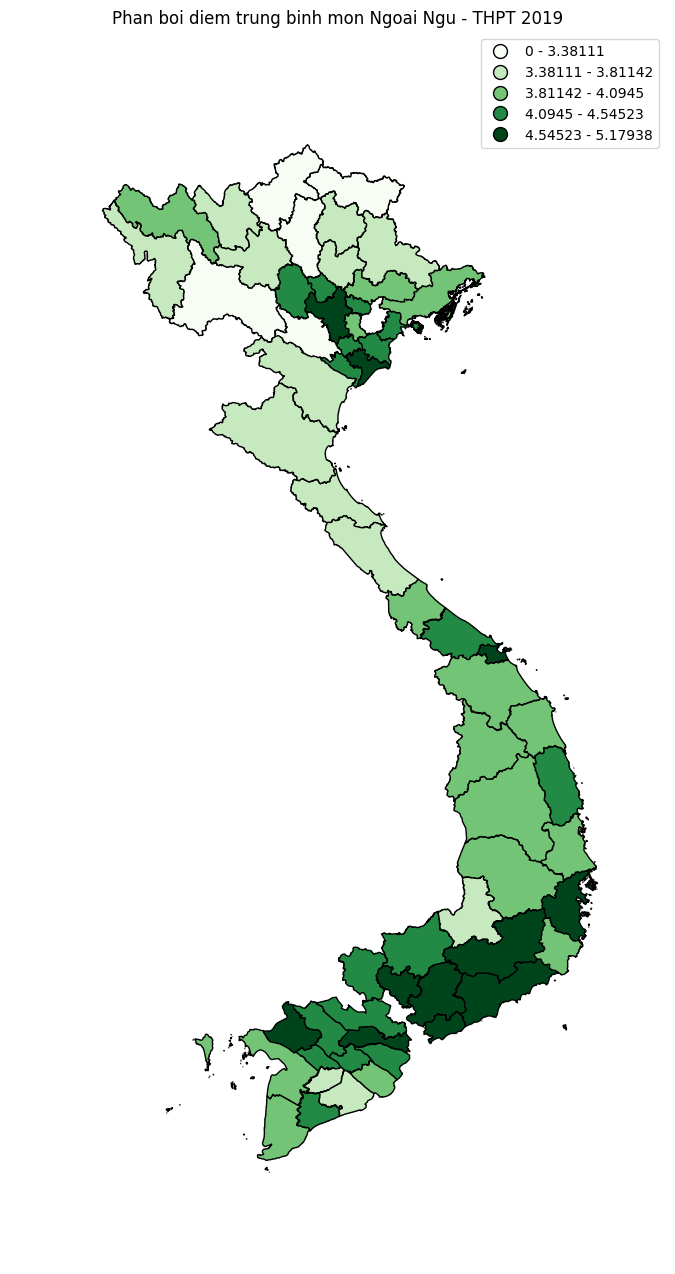

In [ ]:
# plt.figure(figsize=(6, 10))
ax = gplt.choropleth(
    exam2019_by_province, hue='Ngoai Ngu', projection=gcrs.AlbersEqualArea(),
    edgecolor='black', linewidth=1,
    cmap='Greens', legend=True,
    scheme='FisherJenks',
    figsize=(12, 16))

ax.set_title("Phan boi diem trung binh mon Ngoai Ngu - THPT 2019")

In [ ]:
exam2019_by_province_median = exam2019.groupby(['province', 'geometry'])[['Ngu Van', 'Toan Hoc', 'Ngoai Ngu']].agg('median')
exam2019_by_province_median.reset_index(inplace=True)
exam2019_by_province_median = gpd.GeoDataFrame(exam2019_by_province_median,crs="EPSG:4326", geometry='geometry')

c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\geoplot\geoplot.py:966: UserWarning: Numba not installed. Using slow pure python version.
  self.set_hue_values(color_kwarg=None, default_color=None)


Text(0.5, 1.0, 'Phan boi diem trung vi mon Ngoai Ngu - THPT 2019')

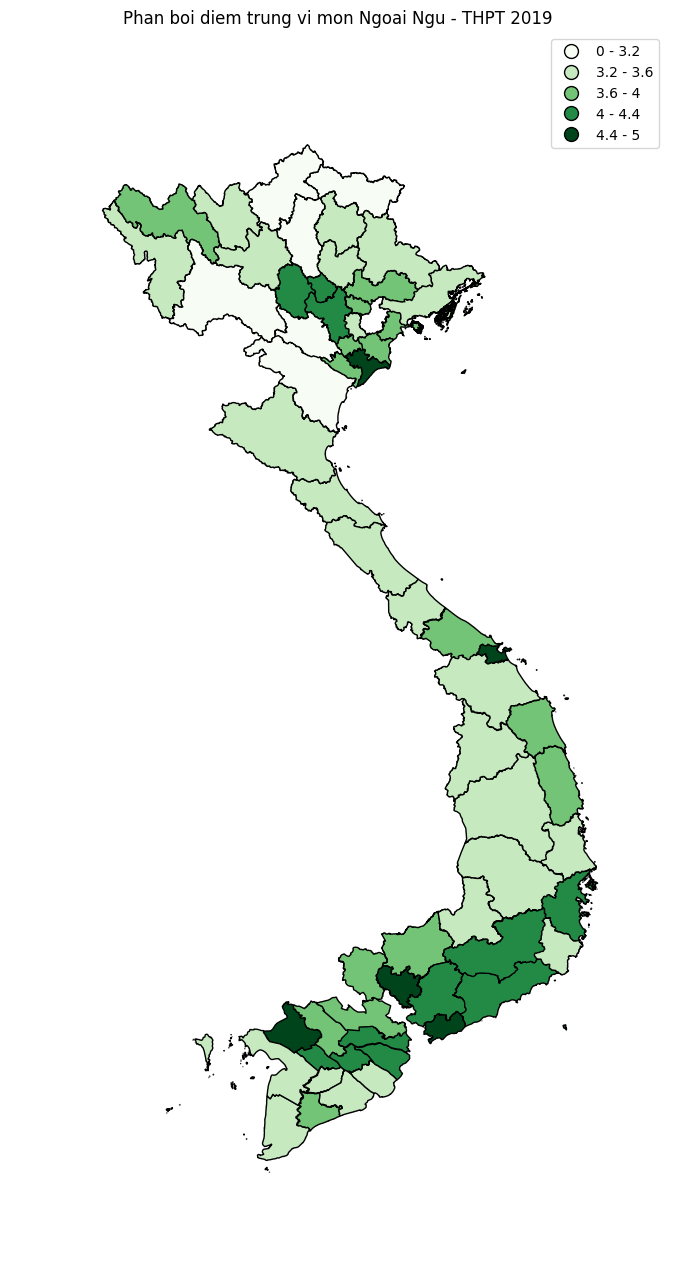

In [ ]:
# plt.figure(figsize=(6, 10))
ax = gplt.choropleth(
    exam2019_by_province_median, hue='Ngoai Ngu', projection=gcrs.AlbersEqualArea(),
    edgecolor='black', linewidth=1,
    cmap='Greens', legend=True,
    scheme='FisherJenks',
    figsize=(12, 16))

ax.set_title("Phan boi diem trung vi mon Ngoai Ngu - THPT 2019")

In [14]:
subject = 'Ngu Van'
exam2019_good_cnt = exam2019[exam2019[subject] >= 8].groupby(['province', 'geometry']).count() 
exam2019_cnt = exam2019.groupby(['province', 'geometry']).count()
# print(exam2019_good_cnt / exam2019_cnt)

print(exam2019_good_cnt)
print(exam2019_cnt)

                                                                 SBD  Ngu Van  \
province      geometry                                                          
AnGiang       MULTIPOLYGON (((105.54860 10.42950, 105.54950 ...  647      647   
BaRia-VungTau MULTIPOLYGON (((107.09010 10.32400, 107.08890 ...  161      161   
BacGiang      MULTIPOLYGON (((106.28380 21.13230, 106.27340 ...  298      298   
BacKan        MULTIPOLYGON (((105.87240 21.85580, 105.86290 ...   75       75   
BacLieu       MULTIPOLYGON (((105.42440 9.02130, 105.41640 9...   97       97   
...                                                              ...      ...   
TraVinh       MULTIPOLYGON (((106.41350 9.52920, 106.40880 9...   60       60   
TuyenQuang    MULTIPOLYGON (((105.51040 21.60470, 105.51410 ...  206      206   
VinhLong      MULTIPOLYGON (((106.06320 9.94750, 106.06270 9...   69       69   
VinhPhuc      MULTIPOLYGON (((105.57130 21.16150, 105.53360 ...  563      563   
YenBai        MULTIPOLYGON (

In [23]:
def draw_choropleth(data, subject, title):
    ax = gplt.choropleth(
        data, hue=subject, projection=gcrs.AlbersEqualArea(),
        edgecolor='black', linewidth=1,
        cmap='Greens', legend=True,
        scheme='FisherJenks',
        figsize=(12, 16))

    ax.set_title(title)

def makeGeopandas(data):
    res = gpd.GeoDataFrame(data,crs="EPSG:4326", geometry='geometry')
    return res

def calculateRatio(subject):
    good_cnt = exam2019[exam2019[subject] >= 8].groupby(['province', 'geometry']).count() 
    return good_cnt / exam2019_cnt    
    

c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\geoplot\geoplot.py:966: UserWarning: Numba not installed. Using slow pure python version.
  self.set_hue_values(color_kwarg=None, default_color=None)


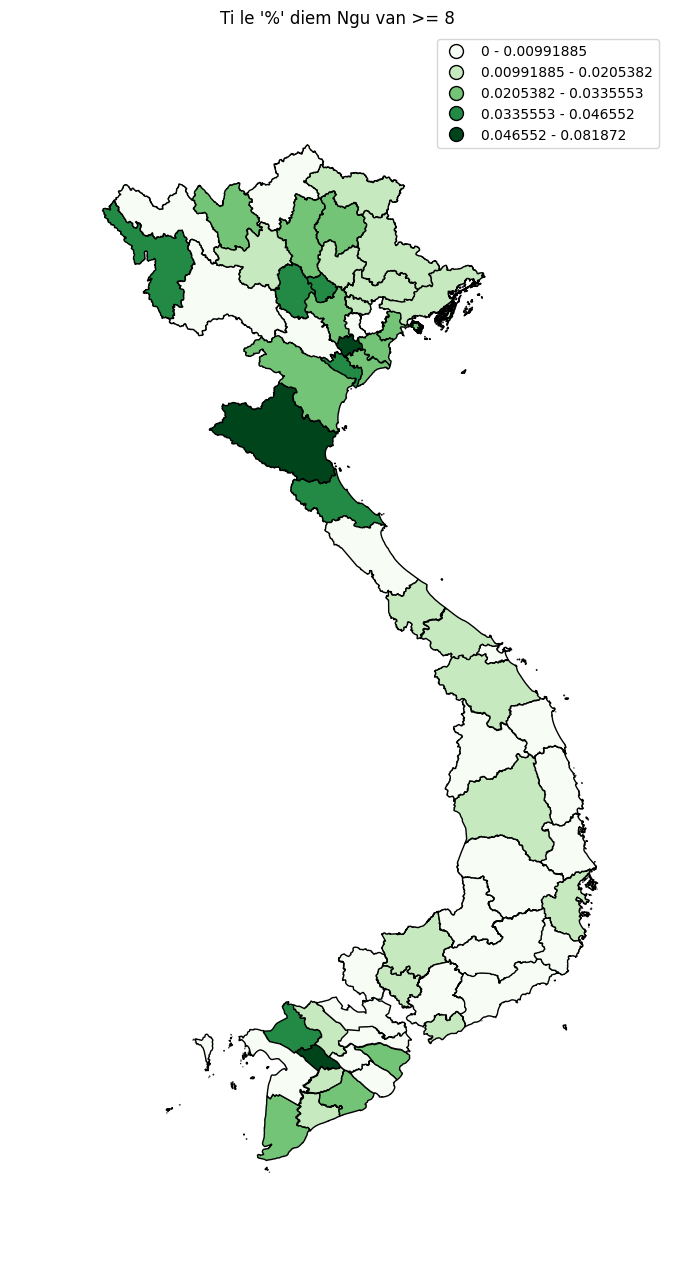

In [22]:
exam_2019_good_ratio = exam2019_good_cnt / exam2019_cnt

draw_choropleth(makeGeopandas(exam_2019_good_ratio.reset_index()), "Ngu Van", "Ti le '%' diem Ngu van >= 8")

c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\geoplot\geoplot.py:966: UserWarning: Numba not installed. Using slow pure python version.
  self.set_hue_values(color_kwarg=None, default_color=None)


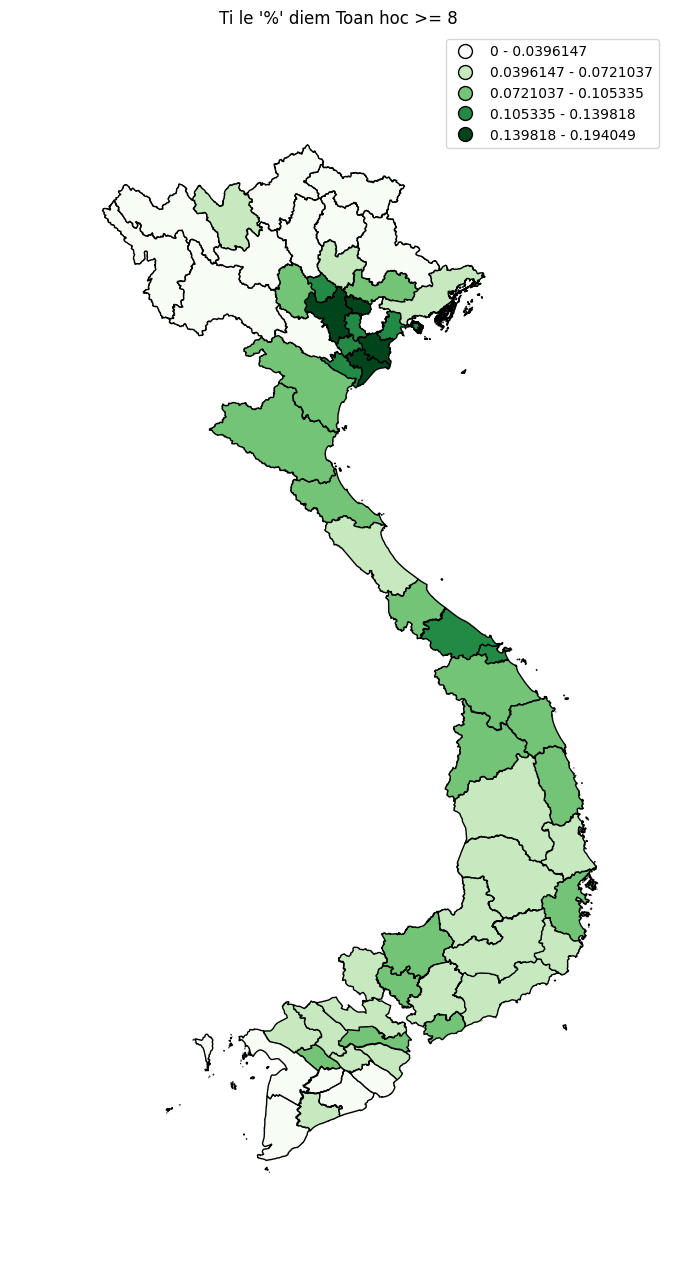

In [25]:
draw_choropleth(makeGeopandas((calculateRatio('Toan Hoc')).reset_index()), "Toan Hoc", "Ti le '%' diem Toan hoc >= 8")

c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\geoplot\geoplot.py:966: UserWarning: Numba not installed. Using slow pure python version.
  self.set_hue_values(color_kwarg=None, default_color=None)


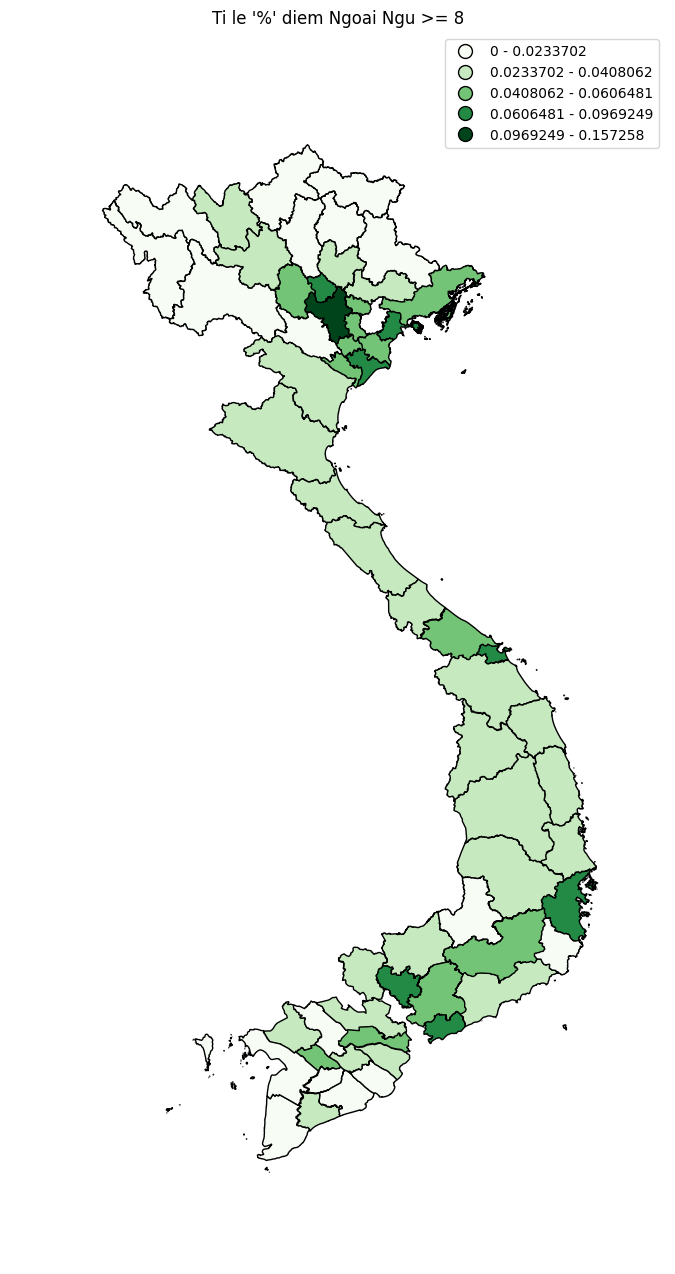

In [27]:
draw_choropleth(makeGeopandas((calculateRatio('Ngoai Ngu')).reset_index()), "Ngoai Ngu", "Ti le '%' diem Ngoai Ngu >= 8")